# **Predicting Health Insurance**

**Introduction to Data Science 2024/2025 | Group xxx**

| Name          | Number      |
| ------------- | ----------- |
| Athos Freitas | up202108792 |
| José Santos   | up202108729 |
| Luís Du       | up202105385 |

## **Table of contents**

- [1. Business Understanding](#1-business-understanding)
- [2. Data Understanding](#2-data-understanding)
  - [2.1. Initial Data Collection](#21-initial-data-collection-and-description)
  - [2.2. Data Description](#22-data-description)
  - [2.3. Data Exploration](#23-data-exploration)
    - [2.3.1. Age](#231-age)
    - [2.3.2. Income](#232-income)
    - [2.3.1. Sex](#231-age)
    - [2.3.1. Health insurance](#231-age)
    - [2.3.1. Recent move](#231-age)
    - [2.3.1. Number of vehicles](#231-age)
    - [2.3.1. Gas Usage](#231-age)
    - [2.3.3. Income by age group](#233-income-by-age-group)
    - [2.3.4. Probability of health insurance by age]()
    - [2.3.5. Marital status by housing type]()
    - [2.3.6. Health insurance by marital status]()
    - [2.3.7. Correlation Matrix]()
    - [2.3.8. Customer by state of residence]()
    - [2.3.9. Code column by state of residence]()


## **1. Business Understanding**

| **Category**                          | **Details**                                                                 |
|---------------------------------------|-----------------------------------------------------------------------------|
| Background                            | In the US, health insurance is important for the financial security of the population. Companies aim to improve enrollment rates. Predicting whether a customer is likely to take up insurance can help optimize resource allocation and improve customer engagement strategies. |
| Business Objectives                   | Build a model to predict which of your customers don’t have health insurance. |
| Business Success Criteria             | Successfully predict the customers that don't have health insurance according to the provided data. |
| Inventory of Resources                | **Data**: A dataset with demographic and behavioral attributes such as employment status, income, housing type, marital status, and more. <br> **Tools**: Python Libraries, Jupyter Notebook. |
| Requirements                          | ???                                                                          |
| Assumptions                           | Data accurately reflects the characteristics of customers.                   |
| Constraints                           | Data imbalance in certain attributes.                                        |
| Risks and Contingencies               | **Risk**: Missing values or noisy data could reduce model accuracy. <br> **Contingency**: Data cleaning and preprocessing steps. |
| Costs and Benefits                    | **Costs**: Initial setup, data preprocessing, and operationalizing the model. <br> **Benefits**: Improved conversion rates and data-driven decision-making. |
| Data Mining Goals                     | Develop a predictive model to classify customers based on their likelihood to purchase health insurance. <br> Identify the most influential factors that drive insurance uptake. |
| Data Mining Success Criteria          | Model accuracy above 80%. <br> Identify the top 5 features that influence insurance uptake. |


## **2. Data Understanding**

### **2.1. Initial Data Collection**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotUtils import Utils

df = pd.read_csv('customer.csv')
utils = Utils(df)

df.head()

,Unnamed: 0,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,7,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
1,8,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
2,9,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
3,10,000008529_01,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
4,11,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72458 entries, 0 to 72457
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      72458 non-null  int64  
 1   custid          72458 non-null  object 
 2   sex             72458 non-null  object 
 3   is_employed     46943 non-null  object 
 4   income          72458 non-null  float64
 5   marital_status  72458 non-null  object 
 6   health_ins      72458 non-null  bool   
 7   housing_type    70772 non-null  object 
 8   num_vehicles    70772 non-null  float64
 9   age             72458 non-null  int64  
 10  state_of_res    72458 non-null  object 
 11  code_column     72458 non-null  int64  
 12  gas_usage       70772 non-null  float64
 13  rooms           72458 non-null  int64  
 14  recent_move_b   70771 non-null  object 
dtypes: bool(1), float64(3), int64(4), object(7)
memory usage: 7.8+ MB


### **2.2. Data Description**

In [3]:
df.describe()

,Unnamed: 0,income,num_vehicles,age,code_column,gas_usage,rooms
count,72458.000000,7.245800e+04,70772.000000,72458.000000,72458.000000,70772.000000,72458.000000
mean,49910.637556,4.188143e+04,2.066820,49.208893,3285.523572,41.230501,3.494549
std,28772.082702,5.827460e+04,1.170076,18.090035,2661.775225,63.149323,1.706537
min,7.000000,-6.900000e+03,0.000000,0.000000,131.000000,1.000000,1.000000
25%,24911.250000,1.070000e+04,1.000000,34.000000,1305.000000,3.000000,2.000000
50%,49838.000000,2.640000e+04,2.000000,48.000000,2269.000000,10.000000,3.000000
75%,74786.750000,5.200000e+04,3.000000,62.000000,4979.000000,60.000000,5.000000
max,100000.000000,1.257000e+06,6.000000,120.000000,8962.000000,570.000000,6.000000


#### ➜ **Number of observations and variables**

The dataset has **72458** observations and **15** variables

In [4]:
df.shape

(72458, 15)

#### ➜ **Variable types**

| Type        | Number | Variables                                                        |
| ----------- | ------ | ---------------------------------------------------------------- |
| Numeric     | 7      | unamed, income, num_vehicles, age, code_column, gas_usage, rooms |
| Text        | 2      | custid, state_of_res                                             |
| Categorical | 3      | sex, marital_status, housing_type                                |
| Boolean     | 3      | is_employed, health_ins, recent_move_b                           |


#### ➜ **Missing values**

In [5]:
df.isnull().sum()

Unnamed: 0            0
custid                0
sex                   0
is_employed       25515
income                0
marital_status        0
health_ins            0
housing_type       1686
num_vehicles       1686
age                   0
state_of_res          0
code_column           0
gas_usage          1686
rooms                 0
recent_move_b      1687
dtype: int64

![mssing_values.png](images/missing_values.png)

#### ➜ **Duplicate rows**

In [6]:
df.duplicated().sum()

np.int64(0)

### **2.3. Data Exploration**

#### **2.3.1. Age**

##### **➜ Age Statistics**

In [7]:
utils.print_statistics('age')

| Statistics | Value |
| --- | --- |
| Mean | 49.21 |
| Standard Deviation | 18.09 |
| Minimum | 0.00 |
| 25th percentile | 34.00 |
| Median | 48.00 |
| 75th percentile | 62.00 |
| Maximum | 120.00 |

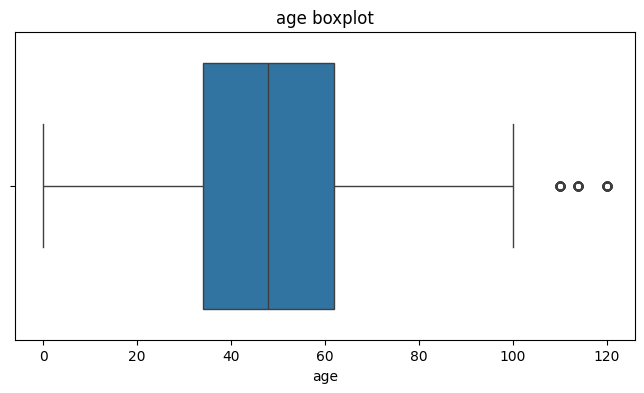

In [8]:
utils.plot_statistics('age')

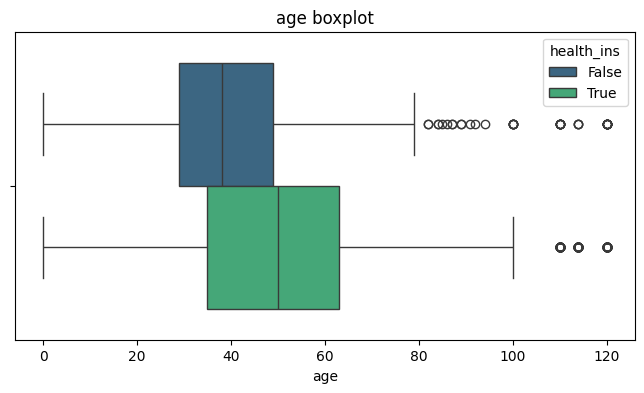

In [9]:
utils.plot_statistics('age', with_target_value=True)

##### **➜ Age Distribution**

Most of the customers are young or early 40s, between 18 and 45 years old.

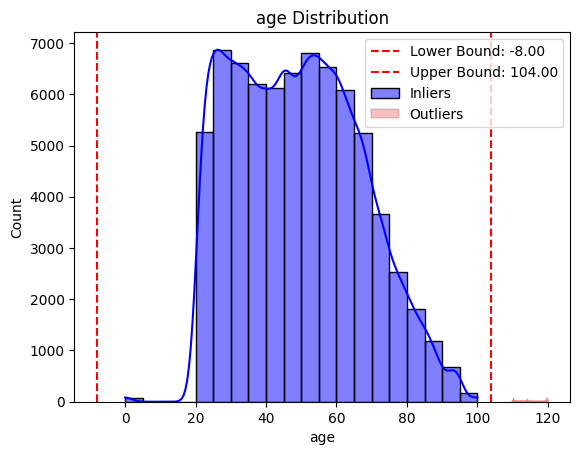

In [10]:
utils.plot_distribution('age')

#### **2.3.2. Income**

##### **➜ Income Statistics**

In [11]:
utils.print_statistics('income')

| Statistics | Value |
| --- | --- |
| Mean | 41881.43 |
| Standard Deviation | 58274.60 |
| Minimum | -6900.00 |
| 25th percentile | 10700.00 |
| Median | 26400.00 |
| 75th percentile | 52000.00 |
| Maximum | 1257000.00 |

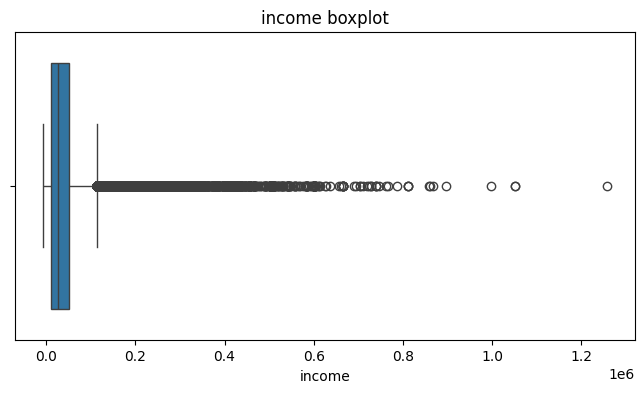

In [12]:
utils.plot_statistics('income')

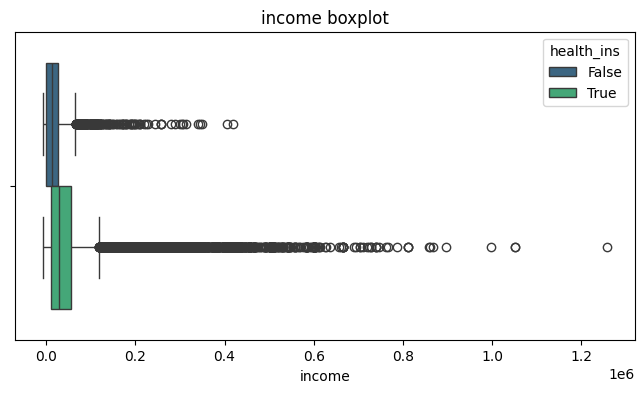

In [13]:
utils.plot_statistics('income', with_target_value=True)

##### **➜ Income Distribution**

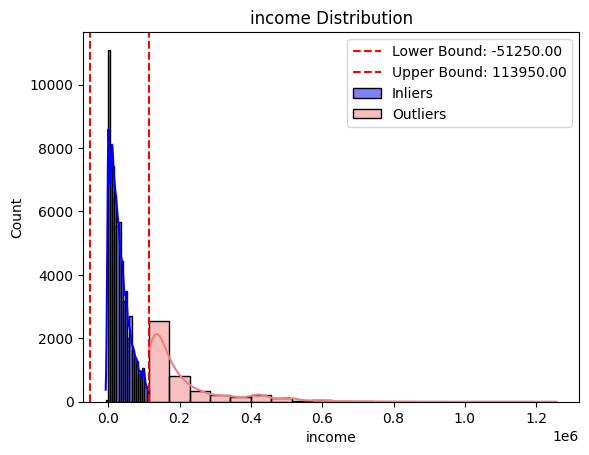

In [14]:
utils.plot_distribution('income')

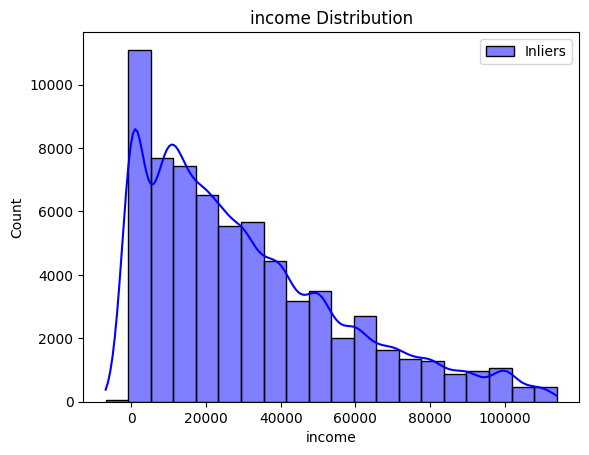

In [15]:
utils.plot_distribution('income', plot_outliers=False)

#### **2.3. Sex**

##### **➜ Sex Statistics**

In [16]:
#utils.print_statistics('sex')

c:\Users\luisd\Desktop\IA\ICD\HealthInsurance\plotUtils.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=self.df, palette='viridis')


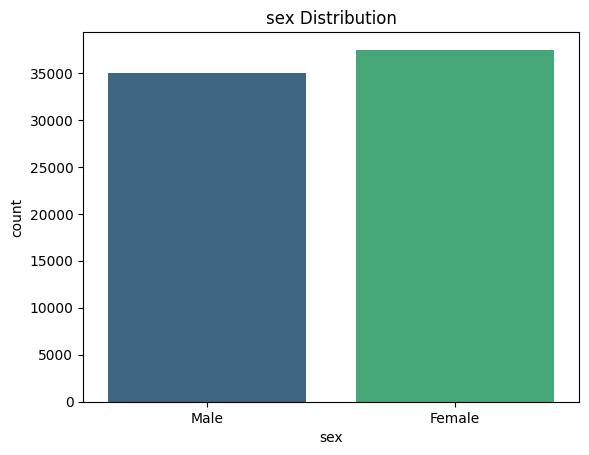

In [17]:
utils.plot_categorical_distribution('sex')

#### **2.3. Health insurance**

##### **➜ Health insurance Statistics**

c:\Users\luisd\Desktop\IA\ICD\HealthInsurance\plotUtils.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=self.df, palette='viridis')


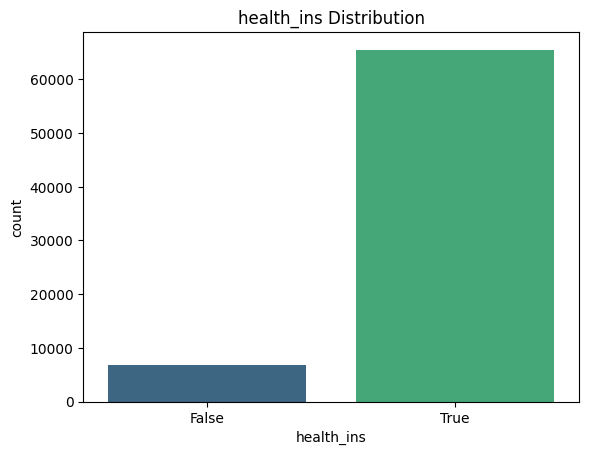

In [18]:
utils.plot_distribution('health_ins')

#### **2.3. Recent move**

##### **➜ Recent move Statistics**

c:\Users\luisd\Desktop\IA\ICD\HealthInsurance\plotUtils.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=self.df, palette='viridis')


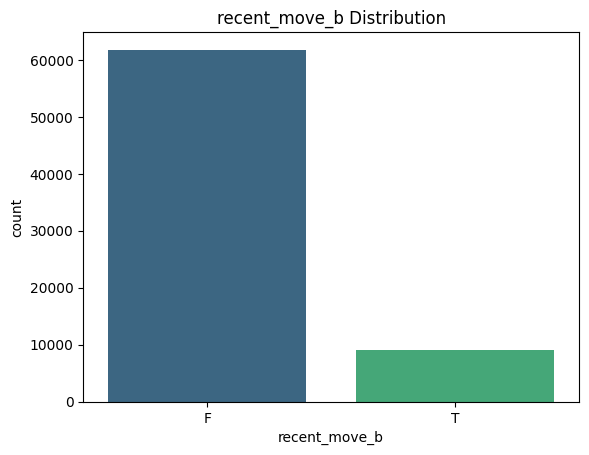

In [19]:
utils.plot_distribution('recent_move_b')

#### **2.3. Number of vehicles**

##### **➜ Number of vehicles Statistics**

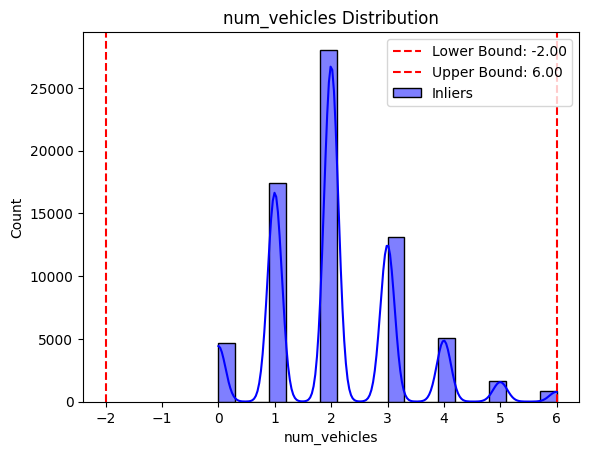

In [20]:
utils.plot_distribution('num_vehicles')

#### **2.3. Gas Usage**

##### **➜ Gas usage Statistics**

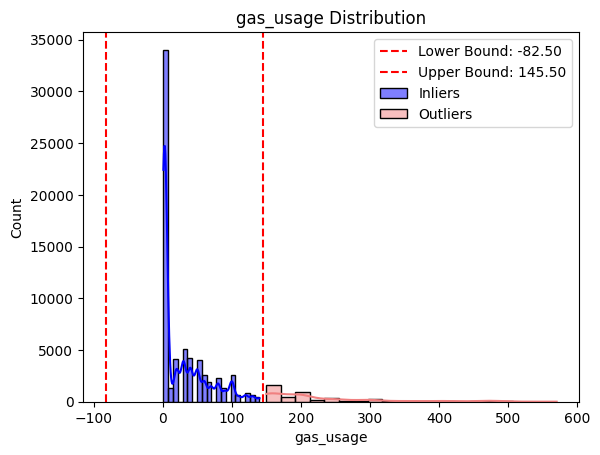

In [21]:
utils.plot_distribution('gas_usage')

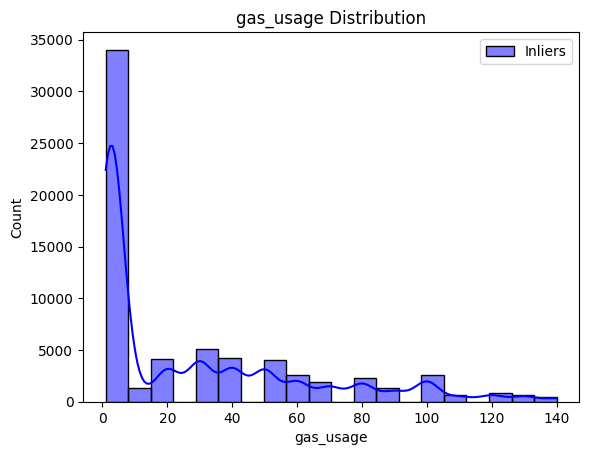

In [22]:
utils.plot_distribution('gas_usage', plot_outliers=False)

#### **2.3. Is employed**

#### **2.3.3. Income by age group**

##### **➜ Scatterplot**

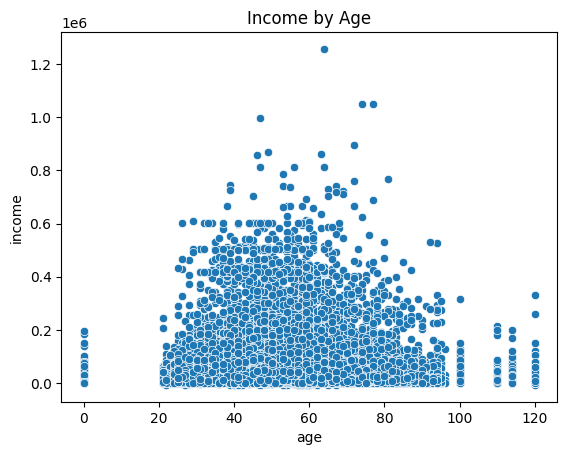

In [23]:
sns.scatterplot(x='age', y='income', data=df)
plt.title('Income by Age')
plt.show()

##### **➜ Boxplot**

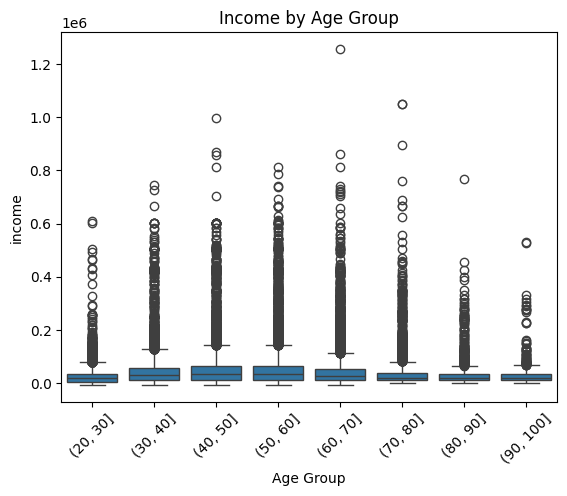

In [24]:
sns.boxplot(x=pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90, 100]), y='income', data=df)
plt.title('Income by Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.show()


#### **2.3.4. Probability of health insurance by age**

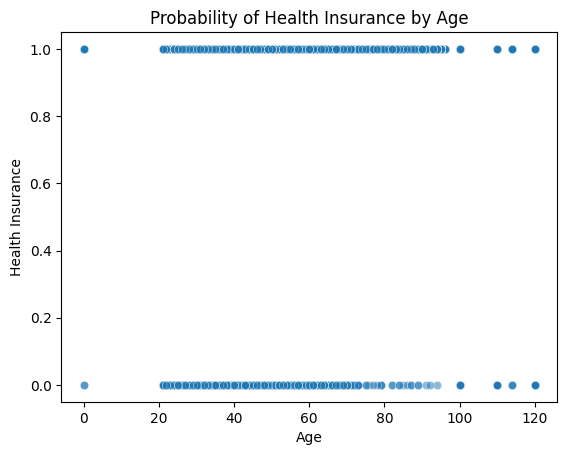

In [25]:
sns.scatterplot(x='age', y='health_ins', data=df, alpha=0.5)
plt.title('Probability of Health Insurance by Age')
plt.xlabel('Age')
plt.ylabel('Health Insurance')
plt.show()

#### **2.3.5. Marital status by housing type**

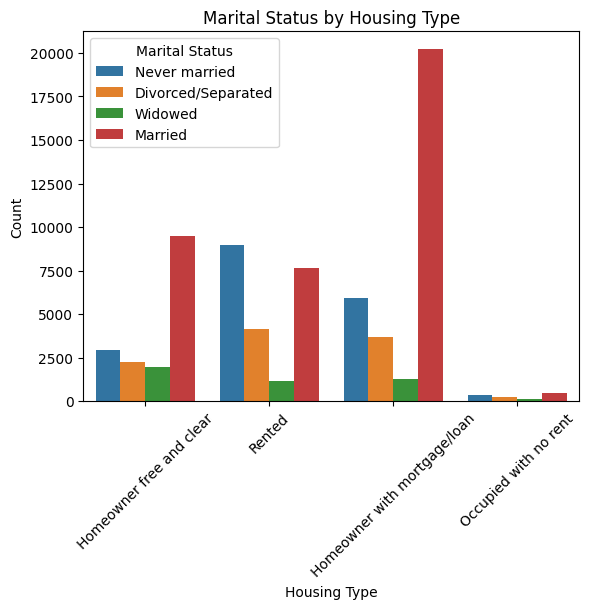

In [26]:
sns.countplot(x='housing_type', hue='marital_status', data=df)
plt.title('Marital Status by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Marital Status')
plt.show()

#### **2.3.6. Health insurance by marital status**

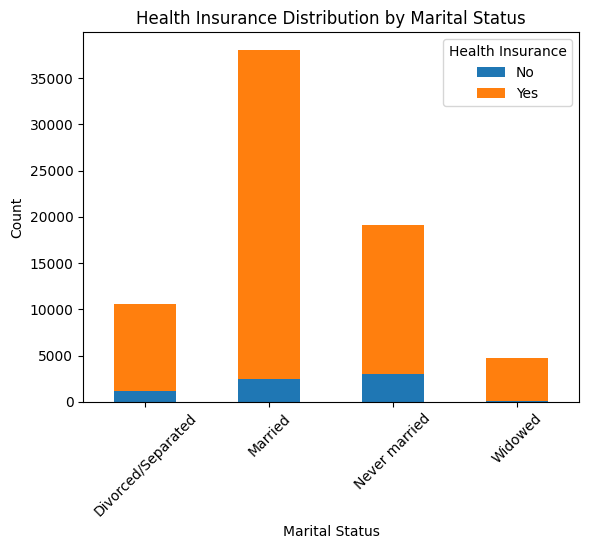

In [27]:
pd.crosstab(df['marital_status'], df['health_ins']).plot(kind='bar', stacked=True)
plt.title('Health Insurance Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Health Insurance', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

#### **2.3.7. Correlation Matrix**

##### **➜ Correlation of rooms, housing_type_num, gas_usage**

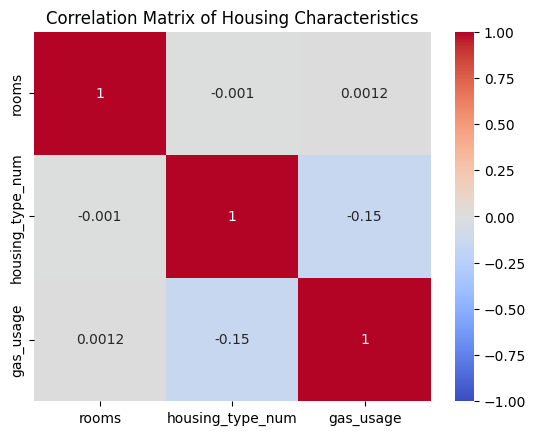

In [28]:
df['housing_type_num'] = df['housing_type'].astype('category').cat.codes

correlation_matrix = df[['rooms', 'housing_type_num', 'gas_usage']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Housing Characteristics')
plt.show()

##### **➜ Correlation of numerical features**

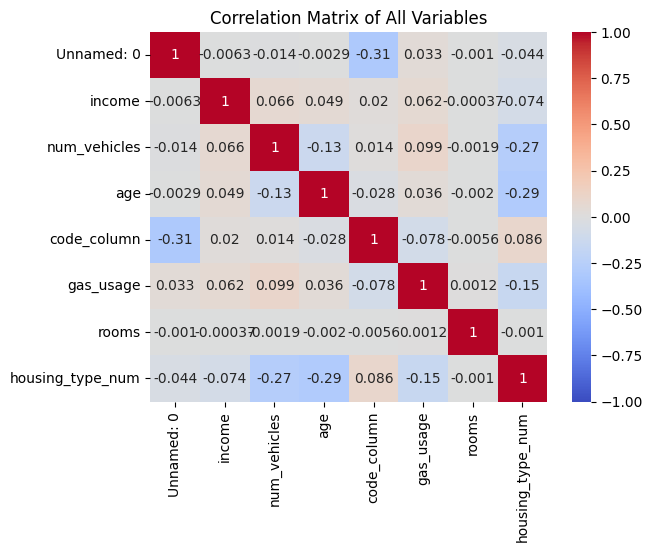

In [29]:

numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix_all = numeric_df.corr()

sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of All Variables')
plt.show()

# como proceder com as variaveis categoricas?

### **2.3.8. Customers by State of residence**

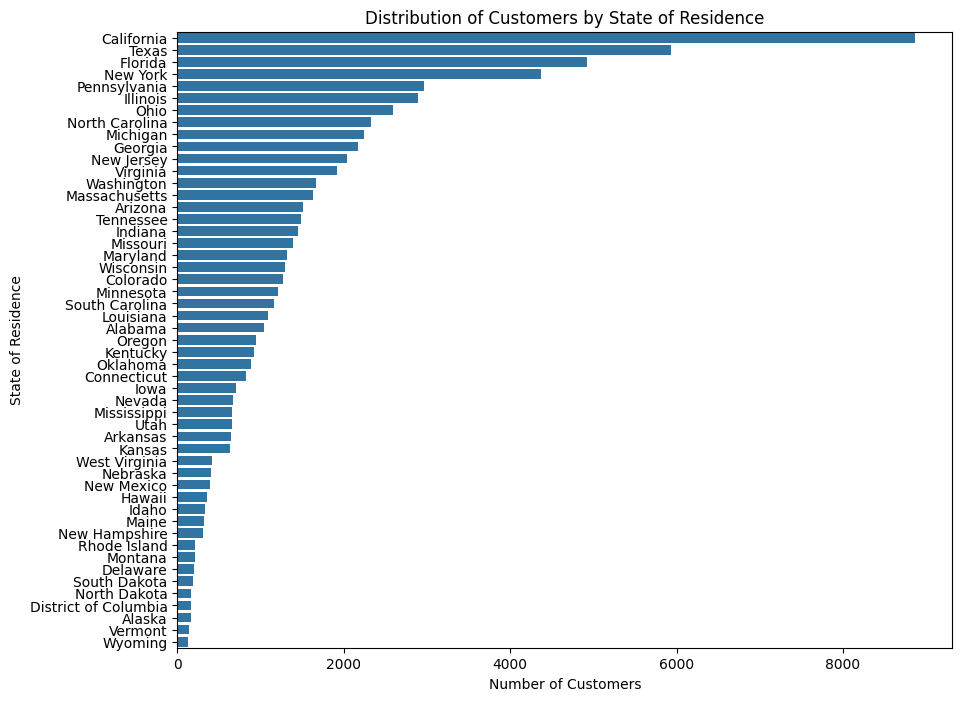

In [30]:
plt.figure(figsize=(10, 8))
sns.countplot(y='state_of_res', data=df, order=df['state_of_res'].value_counts().index)
plt.title('Distribution of Customers by State of Residence')
plt.xlabel('Number of Customers')
plt.ylabel('State of Residence')
plt.show()

#### **3.3.9. Code column by state of residence**

In [31]:
# Find states with more than one unique code_column
states_with_multiple_codes = df.groupby('state_of_res')['code_column'].nunique()
states_with_multiple_codes = states_with_multiple_codes[states_with_multiple_codes > 1]

# Display the result
print(states_with_multiple_codes)

Series([], Name: code_column, dtype: int64)


## Data Preparation

In [32]:
df['recent_move_b'].isna().sum()

np.int64(1687)

In [33]:
# drop rows with age == 0 or age == 120
df = df[df["age"] != 0]
df = df[df["age"] != 120]

In [34]:
df.is_employed.value_counts(dropna=False)

is_employed
True     44547
NaN      25459
False     2309
Name: count, dtype: int64

In [35]:
df.rename({'Unnamed: 0':'idx'}, axis=1, inplace=True)
df.set_index("idx", inplace = True)
df.head()



,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b,housing_type_num
idx,,,,,,,,,,,,,,,
7,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F,0
8,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T,3
9,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F,1
10,000008529_01,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F,0
11,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F,3


In [36]:
df['is_employed'] = df['is_employed'].fillna('Not in Workforce')
df.head()

,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b,housing_type_num
idx,,,,,,,,,,,,,,,
7,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F,0
8,000007827_01,Female,Not in Workforce,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T,3
9,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F,1
10,000008529_01,Female,Not in Workforce,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F,0
11,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F,3


In [37]:
df.drop(columns=['custid'],inplace=True)
df.head()

,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b,housing_type_num
idx,,,,,,,,,,,,,,
7,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F,0
8,Female,Not in Workforce,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T,3
9,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F,1
10,Female,Not in Workforce,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F,0
11,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F,3


In [38]:
df['income'] = df['income'].fillna(df['income'].mean())

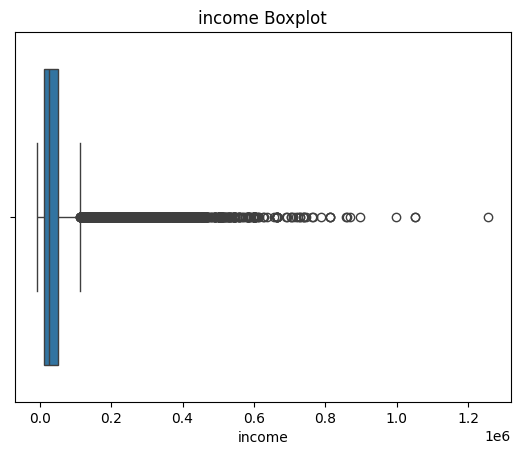

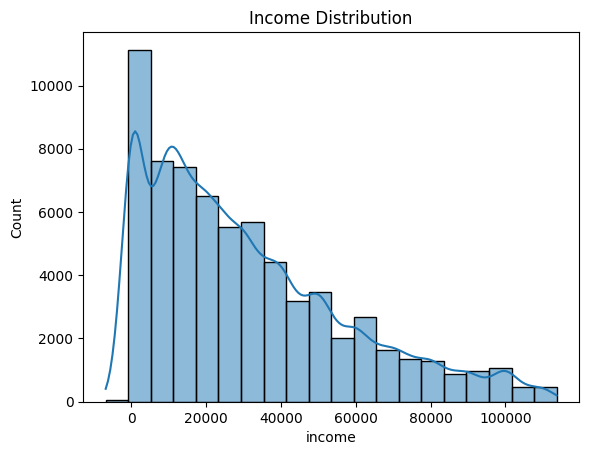

In [39]:
sns.boxplot(x='income',data=df)
plt.title('income Boxplot')

plt.show()

Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['income'] > (Q1 - 1.5 * IQR)) & (df['income'] < (Q3 + 1.5 * IQR))]

sns.histplot(df['income'], kde=True, bins=20)
plt.title('Income Distribution')

plt.show()

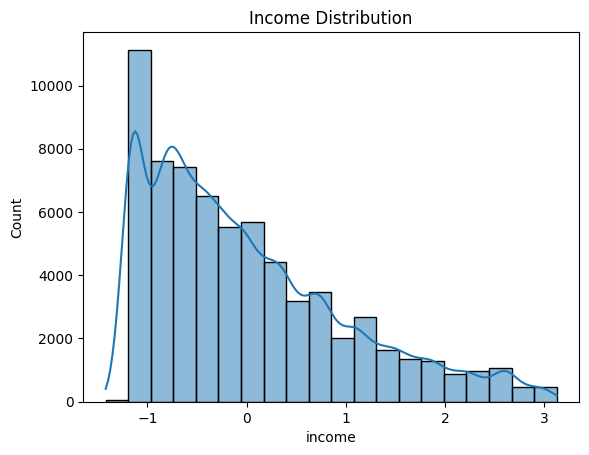

In [40]:
df['income']= (df['income'] - df['income'].mean()) / df['income'].std()

sns.histplot(df['income'], kde=True, bins=20)
plt.title('Income Distribution')

plt.show()

In [41]:
df

,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b,housing_type_num
idx,,,,,,,,,,,,,,
7,Male,True,-0.333244,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F,0
8,Female,Not in Workforce,-0.287999,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T,3
9,Female,True,-0.370949,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F,1
10,Female,Not in Workforce,0.261349,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F,0
11,Male,True,0.307725,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,Female,True,-0.465209,Never married,False,Rented,1.0,25,Wyoming,131,10.0,4,F,3
99997,Female,Not in Workforce,-0.378489,Widowed,True,Homeowner free and clear,1.0,86,Wyoming,131,120.0,6,F,0
99998,Male,True,1.665073,Married,True,Homeowner with mortgage/loan,2.0,50,Wyoming,131,90.0,3,F,1
